# Migros Dataset Sales Forecast

An end-to-end Data Science project with a regression adapted for time series as solution was created three machine learning models to forecast the sales.

Project Development Method

The project was developed based on the CRISP-DS (Cross-Industry Standard Process - Data Science, a.k.a. CRISP-DM) project management method, with the following steps:

-Business Understanding;
-Data Collection;
-Data Cleaning;
-Data Analysis (EDA);
-Data Preparation;
-Machine Learning Modelling;
-Model and Business performance evaluation;
-Model deployment.

Migros is a Swiss retail and supermarket chain with a significant presence in Switzerland and various other countries. It is one of the largest retail companies in Switzerland and operates in several sectors, including grocery stores, hypermarkets, department stores, convenience stores, and online retail.

The Business Problem

The CEO of Migros has requested a comprehensive analysis of the performance of their in-house brand products within their yogurt category. To fulfill this request, the data science team has been tasked with conducting a thorough examination of the sales data for these products.

The Goal

Give a feedback of the sales history, along with the development of a predictive model to forecast sales for the next three months

# Hypothesis

1. Seasonal:
    - Influence of holidays in the sales, expected that months/weeks with holidays have a higher sales rate;
    - Expected that sales rate are higher in winter and autumn;
    - Expected higher sales during school holidays and reduced during usual work holidays
2. Promotion:
    - Is expected that the promotions influence in a higher sales rate.
    
    *Hypothesis are verified in section 7.0


# Machine Learning 

Machine learning models:

Models are in a separate file.
 - Random Forest Regressor;
 - Linear Regression;
 - XGBoost Regressor.

# 1.  Importing packages

In [2]:

import math
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot as plt
from platform                import python_version
import holidays
import seaborn               as sns


In [3]:
print('Python version:', python_version())

Python version: 3.11.5


In [4]:
class DataVisualizer:
    def plot_grouped_bar_chart(self, data, x_label, y_label, title, rotation=45):
        data.plot(kind='bar', figsize=(12, 6))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.legend(title='Promotion Type')
        plt.show()

    def plot_sales_over_time(self, data, products, title):
        plt.figure(figsize=(12, 6))
        for i, product in enumerate(products):
            product_data = data[data['article_name'] == product]
            plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)
        plt.xlabel('Year Week')
        plt.ylabel('Sales')
        plt.title(title)
        plt.legend(loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 2. Uploading CSV

In [5]:
df = pd.read_csv("/Users/ramonburkhard/Downloads/migros_dataset.csv")

# 3. Data

3.1. Product name and sortiment

In [6]:
articles = df['article_name'].unique()
print(articles)
num_of_dif_prod = pd.DataFrame(articles)
print('Number of differents products: ', np.sum(num_of_dif_prod.value_counts()))

['EXC JOGHURT TRUFFES 150G' 'MC JOG. HIMBEER 200G'
 'AHA JOGH. LAKT. CLASSIC' 'BIF JOGHURT NATURE 150G'
 'MC JOG. APF/MANG 200G' 'MC JOGHURT ERDBEER 200G' 'MC JOG. HEIDELBE 200G'
 'EXC JOGHURT CLASSIC 150G' 'MC JOGHURT VANILLE 200G'
 'BIO FT JOG. MOKKA 180G' 'BIF JOGH. NATURE 500G' 'MC JOGHURT NATURE 200G'
 'VAL CREME FRAICHE NA 200G' 'YOG GRECQUE NATURE 180G'
 'MB JOGHURT NATUR 500G' 'MC JOG. SCHOKOLA 200G'
 'AHA JOGH. LAKTOSEF MOCCA' 'MC JOG. HASELNUS 200G' 'BIO KEFIR NATUR 180G'
 'MC JOGHURT MOKKA 200G']
Number of differents products:  20


In [1]:
df.head()

NameError: name 'df' is not defined

3.2  Creating a DF to modify

In [8]:
df1 = df.copy()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5189 non-null   int64  
 1   article_name    5189 non-null   object 
 2   date_id         5189 non-null   int64  
 3   year            5189 non-null   int64  
 4   yearweek_start  5189 non-null   object 
 5   yearweek_end    5189 non-null   object 
 6   month           5189 non-null   int64  
 7   week            5189 non-null   int64  
 8   boss_thema_id   5189 non-null   int64  
 9   promo_01        5189 non-null   int64  
 10  promo_02        5189 non-null   int64  
 11  promo_03        5189 non-null   int64  
 12  promo_04        5189 non-null   int64  
 13  promo_05        5189 non-null   int64  
 14  sales           5189 non-null   float64
dtypes: float64(1), int64(11), object(3)
memory usage: 608.2+ KB


# 4. Data Cleaning

4.1 Rename columns 

In [10]:
df1.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)
df1.rename(columns = {'boos_thema_id': 'group'}, inplace = True)

4.2 transforming datatype of the variables yearweek_start, yearweek_end data to datetime

In [11]:
df1['yearweek_start'] = pd.to_datetime( df1[ 'yearweek_start' ] )
df1['yearweek_end'] = pd.to_datetime(df1['yearweek_end'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5189 non-null   int64         
 1   article_name    5189 non-null   object        
 2   date_id         5189 non-null   int64         
 3   year            5189 non-null   int64         
 4   yearweek_start  5189 non-null   datetime64[ns]
 5   yearweek_end    5189 non-null   datetime64[ns]
 6   month           5189 non-null   int64         
 7   week            5189 non-null   int64         
 8   boss_thema_id   5189 non-null   int64         
 9   promo_01        5189 non-null   int64         
 10  promo_02        5189 non-null   int64         
 11  promo_03        5189 non-null   int64         
 12  promo_04        5189 non-null   int64         
 13  promo_05        5189 non-null   int64         
 14  sales           5189 non-null   float64       
dtypes: d

#### 4.4 Looking for empty cells, missing values or corrupted values

In [12]:
isna = df1.isna().sum()
print('num of NaN: ', isna)
print()
missing_count = df1.isnull().sum()
print('empty cells: ', missing_count)
print()
zero_count = (df1[:] == 0).sum()
print('num of cells conteining 0 values: ', zero_count)


num of NaN:  index             0
article_name      0
date_id           0
year              0
yearweek_start    0
yearweek_end      0
month             0
week              0
boss_thema_id     0
promo_01          0
promo_02          0
promo_03          0
promo_04          0
promo_05          0
sales             0
dtype: int64

empty cells:  index             0
article_name      0
date_id           0
year              0
yearweek_start    0
yearweek_end      0
month             0
week              0
boss_thema_id     0
promo_01          0
promo_02          0
promo_03          0
promo_04          0
promo_05          0
sales             0
dtype: int64

num of cells conteining 0 values:  index                1
article_name         0
date_id              0
year                 0
yearweek_start       0
yearweek_end         0
month                0
week                 0
boss_thema_id        0
promo_01          4749
promo_02          5189
promo_03          5152
promo_04          5103
promo_05   

# 5. Modifying data

5.1 Creating a new column with the weight of the product info

In [13]:
df1['weight'] = df1['article_name'].str.extract(r'(\d+G)', expand=False)

information of weight of products without the weight are added based in migros information

In [14]:
column_name = 'weight'
column_to_move = df1.pop('weight')
df1.insert(2,'weight', column_to_move)
df1['weight'].fillna('150G', inplace=True)

5.2 Function for creating a column for the seasons of year

In [15]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the 'get_season' function to create a new 'season' column
df1['season'] = df1['yearweek_start'].apply(get_season)

In [16]:
column_name = 'season'
column_to_move = df1.pop('season')
df1.insert(5,'season', column_to_move)

5.3 Creating a column for holidays

In [17]:
swiss_holidays = holidays.Switzerland(years=range(2018, 2024))

In [18]:
#creating a column for holidays through function

def is_holiday(date_range):
    start, end = date_range
    for date in pd.date_range(start=start, end=end):
        if date in swiss_holidays:
            return True
    return False

df1['is_holiday'] = df1[['yearweek_start', 'yearweek_end']].apply(is_holiday, axis=1)

column_name = 'is_holiday'
column_to_move = df1.pop('is_holiday')
df1.insert(8,'is_holiday', column_to_move)

5.4 creating a vacation calendar column

In [19]:
def categorize_month(month):
    if month in [7, 8]:  # July and August are common vacation months for both school and work
        return 'School & Work Vacation'
    elif month in [12, 1]:  # December and January often have winter school vacations
        return 'School Vacation'
    else:
        return 'No Vacation'

# Apply the categorization function to the existing 'month' column and create a new column 'vacation_category'
df1['vacation_category'] = df1['month'].apply(categorize_month)

column_name = 'vacation_category'
column_to_move = df1.pop('vacation_category')
df1.insert(9,'vacation_category', column_to_move)

In [20]:
df1.head()

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
0,0,EXC JOGHURT TRUFFES 150G,150G,201802,2018,Winter,2018-01-08,2018-01-14,False,School Vacation,1,2,6,0,0,0,0,0,2979.0
1,1,EXC JOGHURT TRUFFES 150G,150G,201803,2018,Winter,2018-01-15,2018-01-21,False,School Vacation,1,3,6,0,0,0,0,0,2858.0
2,2,EXC JOGHURT TRUFFES 150G,150G,201804,2018,Winter,2018-01-22,2018-01-28,False,School Vacation,1,4,6,1,0,0,0,0,6236.0
3,3,EXC JOGHURT TRUFFES 150G,150G,201805,2018,Winter,2018-01-29,2018-02-04,False,No Vacation,2,5,6,1,0,0,0,0,2861.0
4,4,EXC JOGHURT TRUFFES 150G,150G,201806,2018,Winter,2018-02-05,2018-02-11,False,No Vacation,2,6,6,0,0,0,0,0,2874.0


# 6. Data Analysis

6.1 Descriptive

In [21]:
df1["sales"].describe().T

count     5189.000000
mean      5244.830796
std       3607.710051
min         61.000000
25%       2652.000000
50%       4737.000000
75%       6560.000000
max      21763.000000
Name: sales, dtype: float64

In [22]:
num_attributes = df1.select_dtypes( include = 'number')
cate_attributes = df1.select_dtypes( include = 'object')

In [23]:
cate_attributes.apply( lambda x: x.unique().shape[0])

article_name         20
weight                4
season                4
vacation_category     3
dtype: int64

6.2 Discovering products

In [24]:
min_sale = df1[df1['sales'] == 61]
min_sale

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
4461,4461,MC JOG. HASELNUS 200G,200G,201927,2019,Summer,2019-07-01,2019-07-07,False,School & Work Vacation,7,27,5,0,0,0,0,0,61.0


In [25]:
max_sale = df1[df1['sales'] > 18000]
max_sale

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
3325,3325,VAL CREME FRAICHE NA 200G,200G,202251,2022,Winter,2022-12-19,2022-12-25,True,School Vacation,12,51,10,0,0,0,0,0,19179.0
3994,3994,MC JOG. SCHOKOLA 200G,200G,202019,2020,Spring,2020-05-04,2020-05-10,False,No Vacation,5,19,5,0,0,0,0,0,18239.0
4019,4019,MC JOG. SCHOKOLA 200G,200G,202044,2020,Autumn,2020-10-26,2020-11-01,False,No Vacation,10,44,5,0,0,0,0,1,18411.0
4020,4020,MC JOG. SCHOKOLA 200G,200G,202045,2020,Autumn,2020-11-02,2020-11-08,False,No Vacation,11,45,5,0,0,0,0,1,18787.0
4023,4023,MC JOG. SCHOKOLA 200G,200G,202048,2020,Autumn,2020-11-23,2020-11-29,False,No Vacation,11,48,5,0,0,0,0,1,18180.0
4024,4024,MC JOG. SCHOKOLA 200G,200G,202049,2020,Autumn,2020-11-30,2020-12-06,False,School Vacation,12,49,5,1,0,0,0,1,21763.0
4040,4040,MC JOG. SCHOKOLA 200G,200G,202112,2021,Spring,2021-03-22,2021-03-28,False,No Vacation,3,12,5,0,0,0,0,0,18161.0
4048,4048,MC JOG. SCHOKOLA 200G,200G,202120,2021,Spring,2021-05-17,2021-05-23,True,No Vacation,5,20,5,0,0,0,0,0,18964.0
5008,5008,MC JOGHURT MOKKA 200G,200G,202011,2020,Spring,2020-03-09,2020-03-15,False,No Vacation,3,11,5,0,0,0,0,0,18267.0
5046,5046,MC JOGHURT MOKKA 200G,200G,202049,2020,Autumn,2020-11-30,2020-12-06,False,School Vacation,12,49,5,1,0,0,0,1,18048.0


In [26]:
#sales per product
sales_by_product1 = df1.groupby('article_name')['sales'].mean()
print('Mean:',sales_by_product1.sort_values(ascending=False))
sales_by_product2 = df1.groupby('article_name')['sales'].median()
print()
print('Median: ',sales_by_product2.sort_values(ascending=False))

Mean: article_name
MC JOG. SCHOKOLA 200G        13803.839450
MC JOGHURT MOKKA 200G        12793.023041
BIF JOGHURT NATURE 150G      10213.350340
VAL CREME FRAICHE NA 200G     8370.663265
MC JOGHURT NATURE 200G        7248.470046
MC JOGHURT ERDBEER 200G       6308.423963
MC JOG. APF/MANG 200G         5454.322581
YOG GRECQUE NATURE 180G       5445.534014
MC JOG. HEIDELBE 200G         5373.087558
MC JOG. HASELNUS 200G         5026.557604
MB JOGHURT NATUR 500G         4969.323129
MC JOG. HIMBEER 200G          4834.419355
BIF JOGH. NATURE 500G         4531.299320
AHA JOGH. LAKT. CLASSIC       3287.952381
EXC JOGHURT TRUFFES 150G      3096.857143
MC JOGHURT VANILLE 200G       2693.793578
BIO FT JOG. MOKKA 180G        2418.030612
AHA JOGH. LAKTOSEF MOCCA      1257.799320
EXC JOGHURT CLASSIC 150G      1243.619048
BIO KEFIR NATUR 180G           783.363946
Name: sales, dtype: float64

Median:  article_name
MC JOG. SCHOKOLA 200G        14245.0
MC JOGHURT MOKKA 200G        13250.0
BIF JOGHURT NATU

Sales mean

In [25]:
sales_by_product_weight = df1.groupby(['article_name', 'weight'])['sales'].mean().reset_index()
sales_by_product_weight_sorted = sales_by_product_weight.sort_values(by='sales', ascending=False)
sales_by_product_weight_sorted

,article_name,weight,sales
13,MC JOG. SCHOKOLA 200G,200G,13803.839450
15,MC JOGHURT MOKKA 200G,200G,12793.023041
3,BIF JOGHURT NATURE 150G,150G,10213.350340
18,VAL CREME FRAICHE NA 200G,200G,8370.663265
16,MC JOGHURT NATURE 200G,200G,7248.470046
14,MC JOGHURT ERDBEER 200G,200G,6308.423963
9,MC JOG. APF/MANG 200G,200G,5454.322581
19,YOG GRECQUE NATURE 180G,180G,5445.534014
11,MC JOG. HEIDELBE 200G,200G,5373.087558
10,MC JOG. HASELNUS 200G,200G,5026.557604


In [26]:
sales_by_weight = df1.groupby('weight')['sales'].mean().reset_index()
sales_by_weight_sorted = sales_by_weight.sort_values(by='sales', ascending=False)
sales_by_weight_sorted

,weight,sales
2,200G,7232.001334
3,500G,4750.311224
0,150G,3819.915646
1,180G,2882.309524


6.3  Season Sales

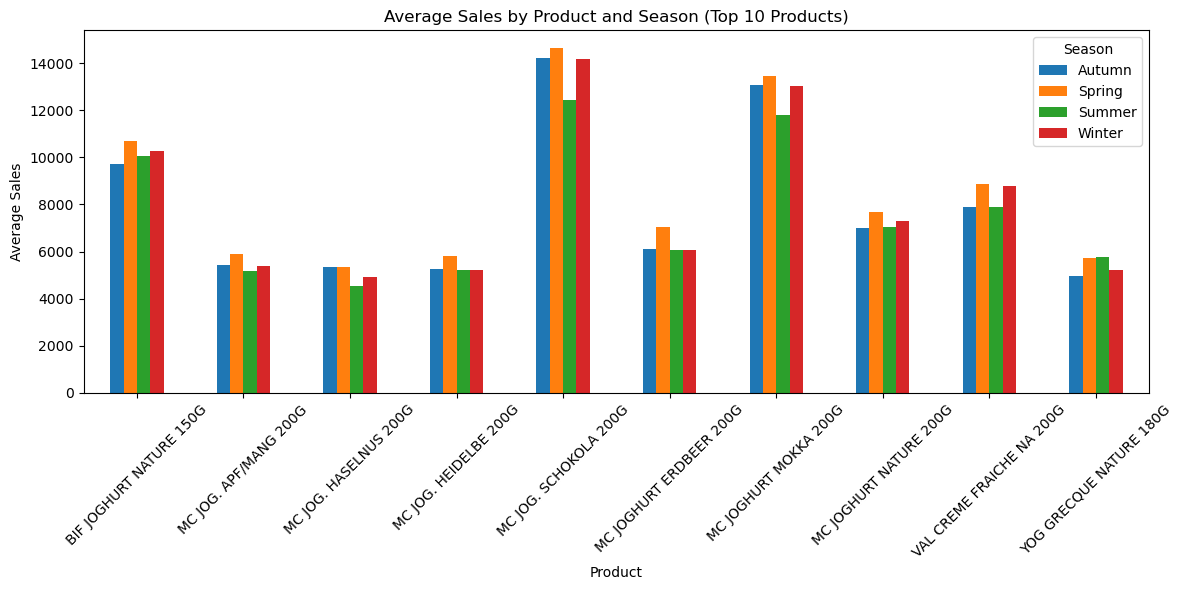

In [58]:
#season sales

# Group by 'article_name' and 'season', and calculate the mean sales
sales_by_season = df1.groupby(['article_name', 'season'])['sales'].mean().reset_index()
top_10_products = sales_by_season.groupby('article_name')['sales'].mean().nlargest(10).index
top_10_df = sales_by_season[sales_by_season['article_name'].isin(top_10_products)]


# Create a grouped bar chart
pivot_df = top_10_df.pivot(index='article_name', columns='season', values='sales')
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales by Product and Season (Top 10 Products)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Season')
plt.show()

6.4 Sales rate with holiday in the week

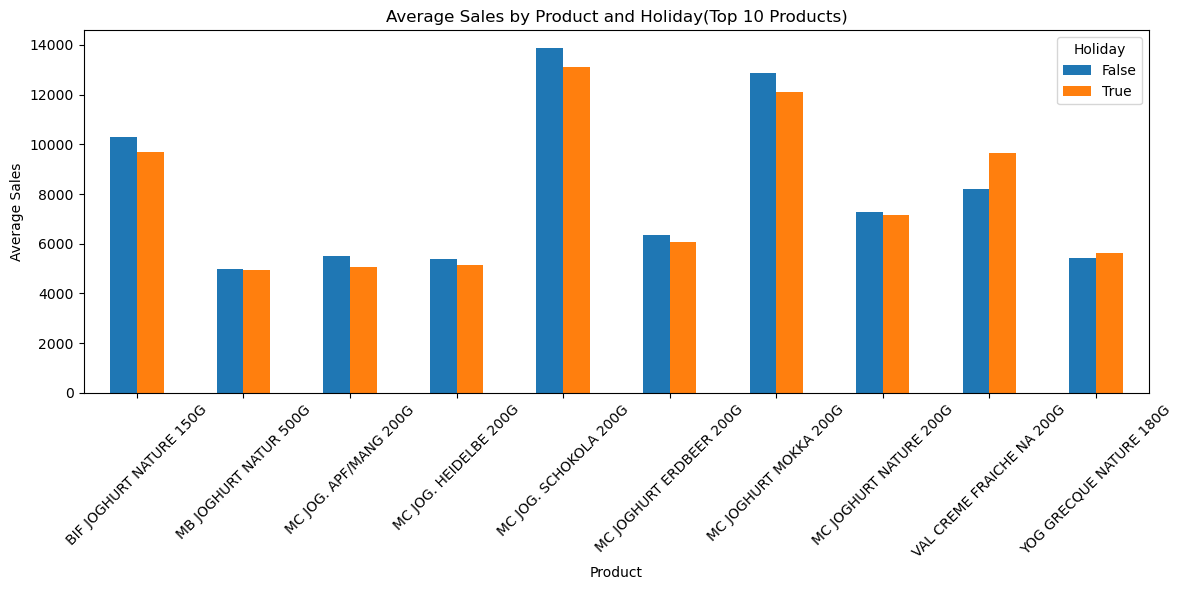

In [28]:
#holiday or not sales

# Group by 'article_name' and 'season', and calculate the mean sales
sales_holiday = df1.groupby(['article_name', 'is_holiday'])['sales'].mean().reset_index()
top_10_products = sales_holiday.groupby('article_name')['sales'].mean().nlargest(10).index
top_10_df = sales_holiday[sales_holiday['article_name'].isin(top_10_products)]



pivot_df = top_10_df.pivot(index='article_name', columns='is_holiday', values='sales')
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales by Product and Holiday(Top 10 Products)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Holiday')
plt.show()

6.5 Sales rate per vacation category

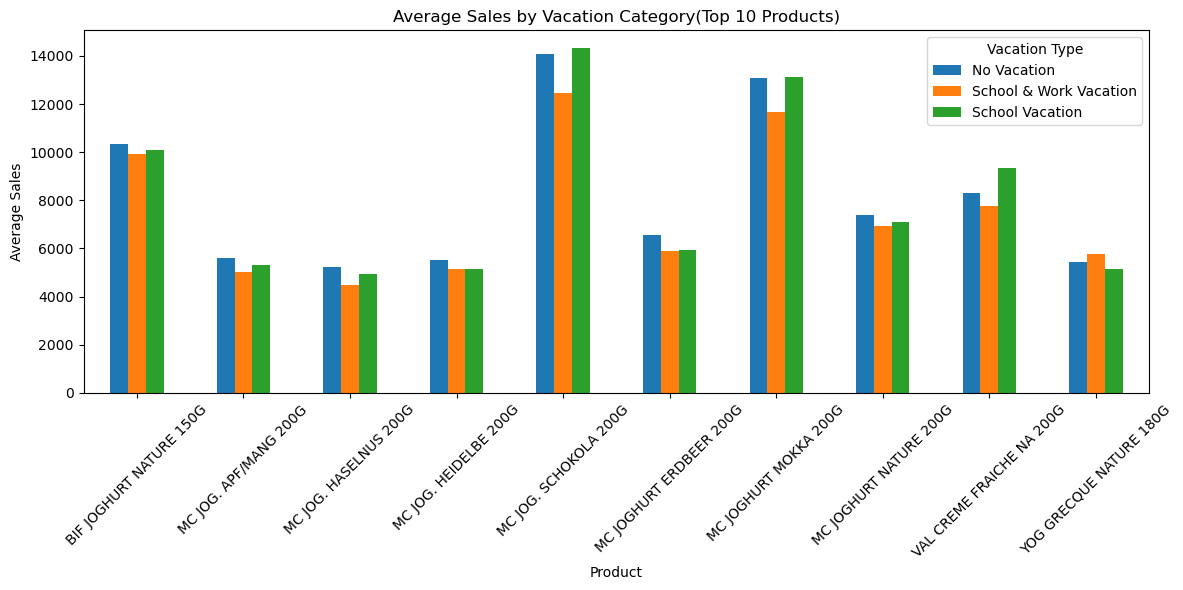

In [29]:
#vacation

# Group by 'article_name' and 'season', and calculate the mean sales
vacation_sales = df1.groupby(['article_name', 'vacation_category'])['sales'].mean().reset_index()
top_10_products = vacation_sales.groupby('article_name')['sales'].mean().nlargest(10).index
top_10_df = vacation_sales[vacation_sales['article_name'].isin(top_10_products)]


# Create a grouped bar chart
pivot_df = top_10_df.pivot(index='article_name', columns='vacation_category', values='sales')
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales by Vacation Category(Top 10 Products)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Vacation Type')
plt.show()

6.6 Sales influenced by promotion

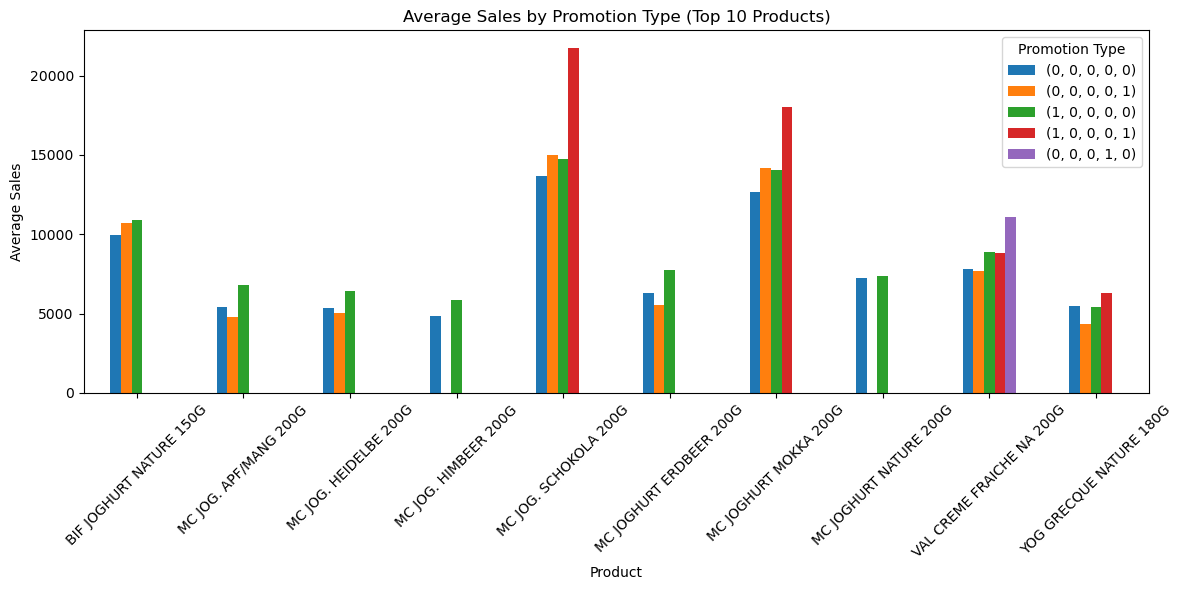

In [31]:
# Group by 'article_name' and promotion columns, and calculate the mean sales

promotion_sales = df1.groupby(['article_name', 'promo_01', 'promo_02', 'promo_03', 'promo_04', 'promo_05'])['sales'].mean().reset_index()
top_10_products = promotion_sales.groupby('article_name')['sales'].mean().nlargest(10).index
top_10_df = promotion_sales[promotion_sales['article_name'].isin(top_10_products)]


# Create a grouped bar chart
pivot_df = top_10_df.pivot(index='article_name', columns=['promo_01', 'promo_02', 'promo_03', 'promo_04', 'promo_05'], values='sales')
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales by Promotion Type (Top 10 Products)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Promotion Type')
plt.show()

6.7 Top 4 products sales variation

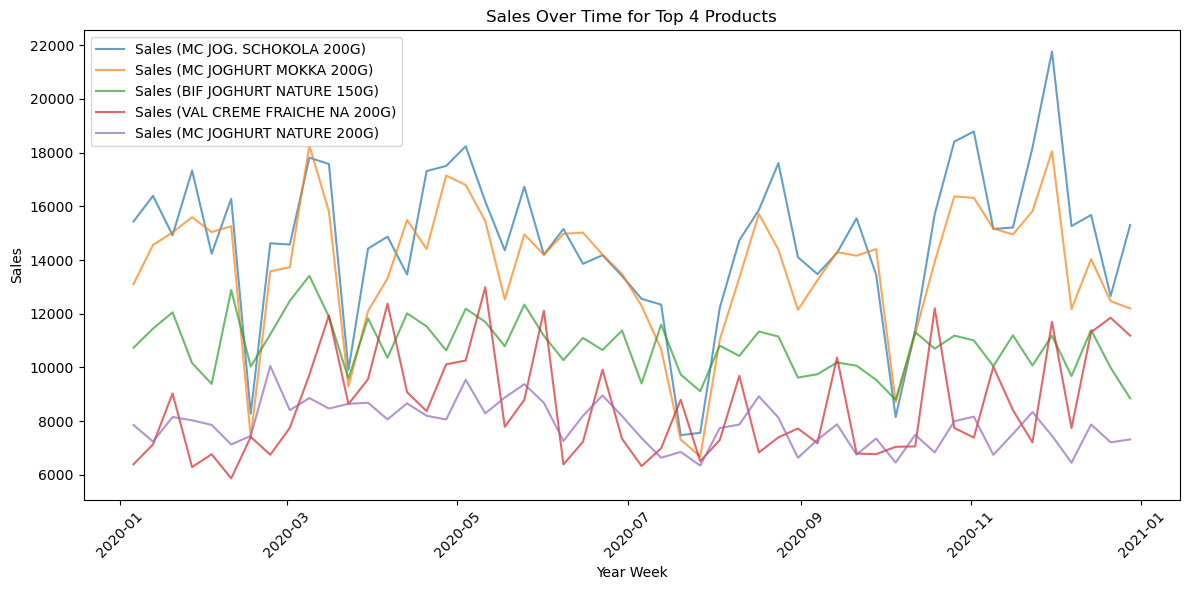

In [63]:
# Get the data for the top 4 products
df3 = df1[df1['yearweek_start'] > '2020-01-01']
df3 = df3[df3['yearweek_start'] < '2021-01-01']
top_4_products = df3.groupby('article_name')['sales'].mean().nlargest(5).index
top_4_df = promotion_sales[promotion_sales['article_name'].isin(top_4_products)]


plt.figure(figsize=(12, 6))

# Plot sales for each product
for i, product in enumerate(top_4_products):
    product_data = df3[df3['article_name'] == product]
    plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)

plt.xlabel('Year Week')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 4 Products')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

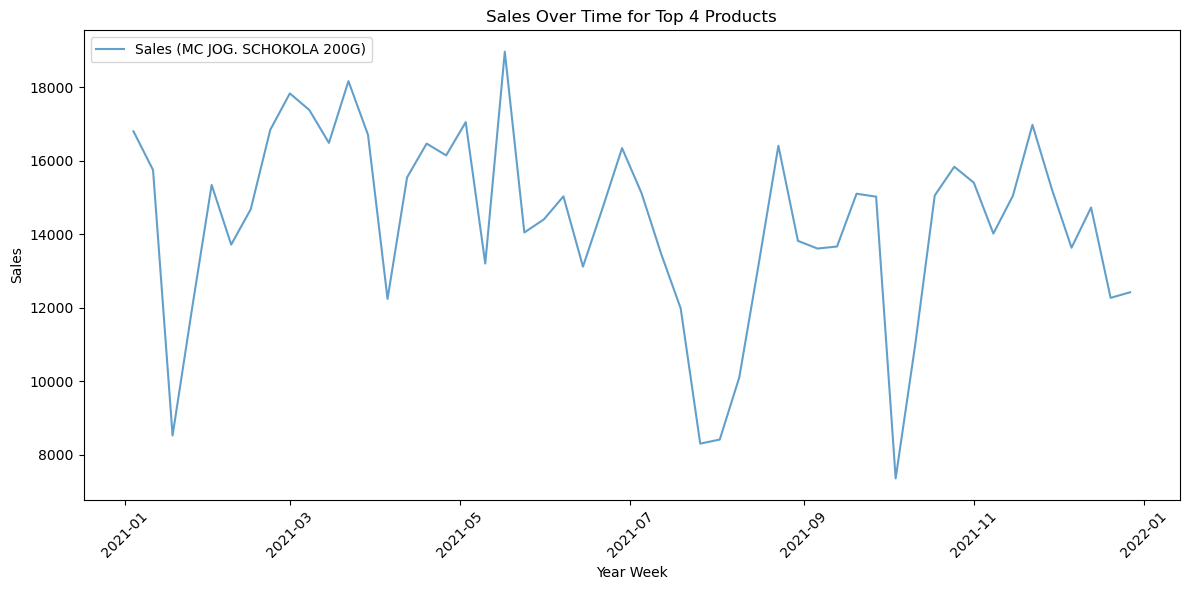

In [33]:
# Get the data for the top 4 products
df3 = df1[df1['yearweek_start'] > '2021-01-01']
df3 = df3[df3['yearweek_start'] < '2022-01-01']
top_4_products = df3.groupby('article_name')['sales'].mean().nlargest(1).index
top_4_df = promotion_sales[promotion_sales['article_name'].isin(top_4_products)]


plt.figure(figsize=(12, 6))

# Plot sales for each product
for i, product in enumerate(top_4_products):
    product_data = df3[df3['article_name'] == product]
    plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)

plt.xlabel('Year Week')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 4 Products')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

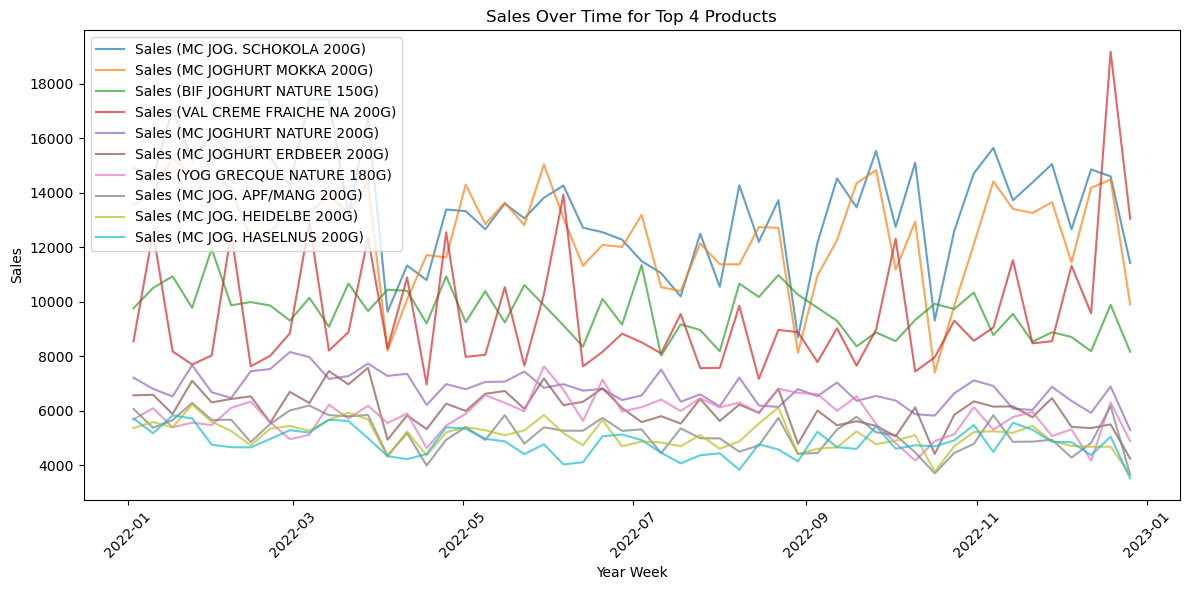

In [34]:
# Get the data for the top 4 products
df3 = df1[df1['yearweek_start'] > '2022-01-01']
df3 = df3[df3['yearweek_start'] < '2023-01-01']
top_4_products = df3.groupby('article_name')['sales'].mean().nlargest(10).index
top_4_df = promotion_sales[promotion_sales['article_name'].isin(top_4_products)]


plt.figure(figsize=(12, 6))

# Plot sales for each product
for i, product in enumerate(top_4_products):
    product_data = df3[df3['article_name'] == product]
    plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)

plt.xlabel('Year Week')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 4 Products')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6.8 Shokolade and Mokka Correlation

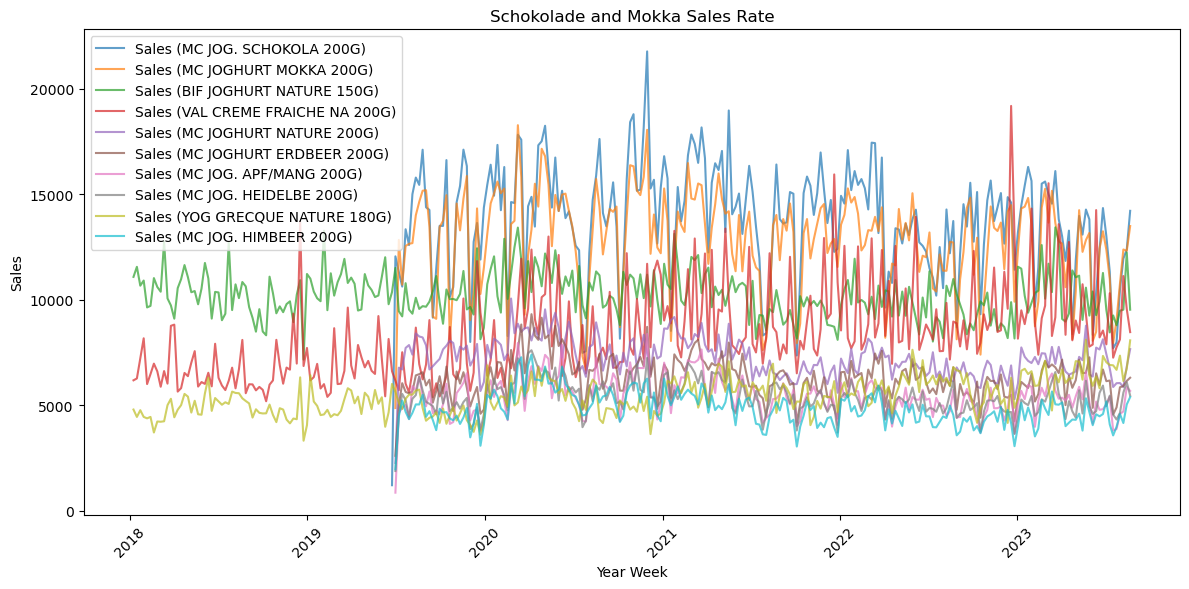

In [61]:
# Shokolade and mokka
top_4_products = promotion_sales.groupby('article_name')['sales'].mean().nlargest(10).index
top_4_df = promotion_sales[promotion_sales['article_name'].isin(top_4_products)]

# Create a single plot for all four products
plt.figure(figsize=(12, 6))

# Plot sales for each product
for i, product in enumerate(top_4_products):
    product_data = df1[df1['article_name'] == product]
    plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)

plt.xlabel('Year Week')
plt.ylabel('Sales')
plt.title('Schokolade and Mokka Sales Rate')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6.9 Erdbeer and Creme fraiche correlation

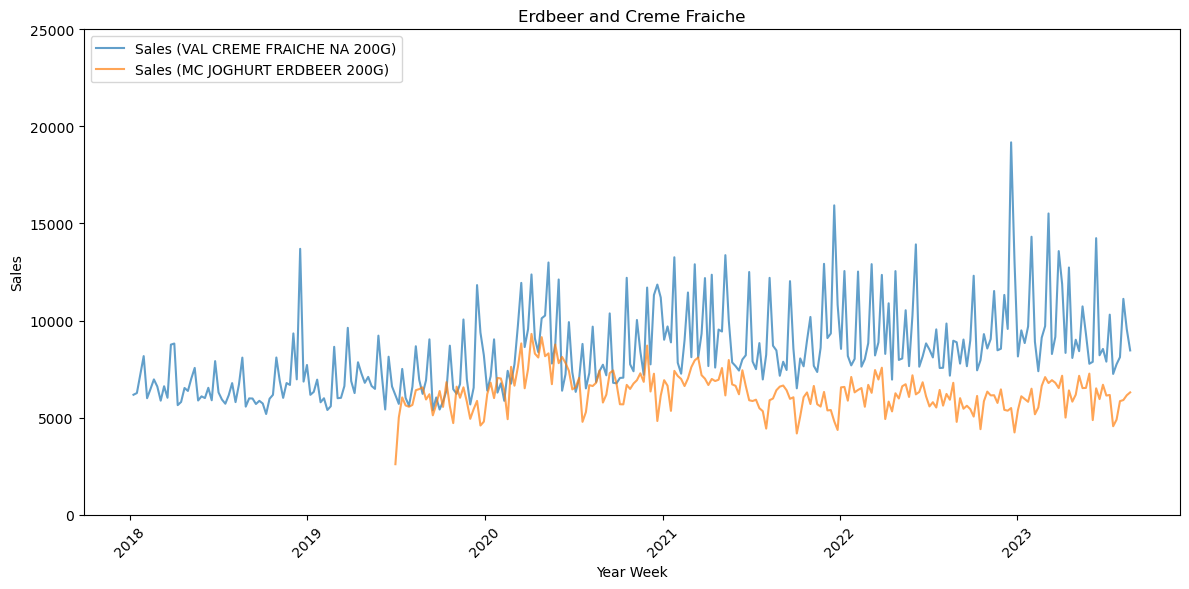

In [36]:
df3 = df1[(df1['article_name'] == 'MC JOGHURT ERDBEER 200G') | (df1['article_name'] == 'VAL CREME FRAICHE NA 200G')]
top_4_products = df3.groupby('article_name')['sales'].mean().nlargest(2).index
top_4_df = promotion_sales[promotion_sales['article_name'].isin(top_4_products)]

# Create a single plot for all four products
plt.figure(figsize=(12, 6))

# Plot sales for each product
for i, product in enumerate(top_4_products):
    product_data = df1[df1['article_name'] == product]
    plt.plot(product_data['yearweek_start'], product_data['sales'], label=f'Sales ({product})', alpha=0.7)

plt.xlabel('Year Week')
plt.ylabel('Sales')
plt.title('Erdbeer and Creme Fraiche')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(0, 25000)  # Adjust the limits as needed

plt.tight_layout()
plt.show()

In [38]:
df1.to_csv('df1', index=False)

In [79]:
df2 = df1.groupby(['article_name','month'])['sales'].mean().reset_index()
df2.sort_values('sales')

,article_name,month,sales
71,BIO KEFIR NATUR 180G,12,692.391304
66,BIO KEFIR NATUR 180G,7,732.961538
69,BIO KEFIR NATUR 180G,10,739.954545
67,BIO KEFIR NATUR 180G,8,759.346154
68,BIO KEFIR NATUR 180G,9,765.000000
...,...,...,...
157,MC JOG. SCHOKOLA 200G,2,14301.312500
160,MC JOG. SCHOKOLA 200G,5,14662.437500
156,MC JOG. SCHOKOLA 200G,1,14858.352941
166,MC JOG. SCHOKOLA 200G,11,15666.250000


In [ ]:
top_10_products = df2.groupby('article_name')['sales'].mean().nlargest(10).index
top_10_df = df2[df2['article_name'].isin(top_10_products)]


# Create a grouped bar chart
pivot_df = top_10_df.pivot(index='article_name', columns='month', values='sales')
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales by Promotion Type (Top 10 Products)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Promotion Type')
plt.show()

6.11 Shokolade lower sales rate

In [39]:
df2 = df1[df1['article_name'] == 'MC JOG. SCHOKOLA 200G' ]
df3 = df2[df2['sales'] < 10000]
df3.sort_values('sales')

#Sales rate of week 2019.06.24 it's a outlier. Could have been caused by a logistik problem (stock)(availabilty)

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
3949,3949,MC JOG. SCHOKOLA 200G,200G,201926,2019,Summer,2019-06-24,2019-06-30,False,No Vacation,6,26,5,0,0,0,0,0,1209.0
4068,4068,MC JOG. SCHOKOLA 200G,200G,202140,2021,Autumn,2021-10-04,2021-10-10,False,No Vacation,10,40,5,0,0,0,0,0,7354.0
4005,4005,MC JOG. SCHOKOLA 200G,200G,202030,2020,Summer,2020-07-20,2020-07-26,False,School & Work Vacation,7,30,5,0,0,0,0,0,7479.0
4006,4006,MC JOG. SCHOKOLA 200G,200G,202031,2020,Summer,2020-07-27,2020-08-02,True,School & Work Vacation,7,31,5,0,0,0,0,0,7565.0
4161,4161,MC JOG. SCHOKOLA 200G,200G,202329,2023,Summer,2023-07-17,2023-07-23,False,School & Work Vacation,7,29,5,0,0,0,0,0,7698.0
4162,4162,MC JOG. SCHOKOLA 200G,200G,202330,2023,Summer,2023-07-24,2023-07-30,False,School & Work Vacation,7,30,5,0,0,0,0,0,7976.0
3972,3972,MC JOG. SCHOKOLA 200G,200G,201949,2019,Winter,2019-12-02,2019-12-08,False,School Vacation,12,49,5,0,0,0,0,0,7997.0
4016,4016,MC JOG. SCHOKOLA 200G,200G,202041,2020,Autumn,2020-10-05,2020-10-11,False,No Vacation,10,41,5,0,0,0,0,0,8152.0
3983,3983,MC JOG. SCHOKOLA 200G,200G,202008,2020,Winter,2020-02-17,2020-02-23,False,No Vacation,2,8,5,0,0,0,0,0,8276.0
4058,4058,MC JOG. SCHOKOLA 200G,200G,202130,2021,Summer,2021-07-26,2021-08-01,True,School & Work Vacation,7,30,5,0,0,0,0,0,8300.0


6.12 Shokolade higher sales rate

In [40]:
df2 = df1[df1['article_name'] == 'MC JOG. SCHOKOLA 200G' ]
df3 = df2[df2['sales'] > 18000]
df3.sort_values('sales')

### the week of more sales rate overall for Schokolade flavour have the factors that in general are influencing more the higher in sales it[s in autumn,
### no holidays during the week, school holiday time, and influenced by promotion 1 and 5.

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
4040,4040,MC JOG. SCHOKOLA 200G,200G,202112,2021,Spring,2021-03-22,2021-03-28,False,No Vacation,3,12,5,0,0,0,0,0,18161.0
4023,4023,MC JOG. SCHOKOLA 200G,200G,202048,2020,Autumn,2020-11-23,2020-11-29,False,No Vacation,11,48,5,0,0,0,0,1,18180.0
3994,3994,MC JOG. SCHOKOLA 200G,200G,202019,2020,Spring,2020-05-04,2020-05-10,False,No Vacation,5,19,5,0,0,0,0,0,18239.0
4019,4019,MC JOG. SCHOKOLA 200G,200G,202044,2020,Autumn,2020-10-26,2020-11-01,False,No Vacation,10,44,5,0,0,0,0,1,18411.0
4020,4020,MC JOG. SCHOKOLA 200G,200G,202045,2020,Autumn,2020-11-02,2020-11-08,False,No Vacation,11,45,5,0,0,0,0,1,18787.0
4048,4048,MC JOG. SCHOKOLA 200G,200G,202120,2021,Spring,2021-05-17,2021-05-23,True,No Vacation,5,20,5,0,0,0,0,0,18964.0
4024,4024,MC JOG. SCHOKOLA 200G,200G,202049,2020,Autumn,2020-11-30,2020-12-06,False,School Vacation,12,49,5,1,0,0,0,1,21763.0


6.13 Mokka lower sales rate

In [41]:
df2 = df1[df1['article_name'] == 'MC JOGHURT MOKKA 200G' ]
df3 = df2[df2['sales'] < 10000]
df3.sort_values('sales')

#lower values influenced by the lack of promotion, school and work vacation and summer

,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
4972,4972,MC JOGHURT MOKKA 200G,200G,201927,2019,Summer,2019-07-01,2019-07-07,False,School & Work Vacation,7,27,5,0,0,0,0,0,4867.0
5028,5028,MC JOGHURT MOKKA 200G,200G,202031,2020,Summer,2020-07-27,2020-08-02,True,School & Work Vacation,7,31,5,0,0,0,0,0,6680.0
5027,5027,MC JOGHURT MOKKA 200G,200G,202030,2020,Summer,2020-07-20,2020-07-26,False,School & Work Vacation,7,30,5,0,0,0,0,0,7316.0
5005,5005,MC JOGHURT MOKKA 200G,200G,202008,2020,Winter,2020-02-17,2020-02-23,False,No Vacation,2,8,5,0,0,0,0,0,7376.0
5144,5144,MC JOGHURT MOKKA 200G,200G,202242,2022,Autumn,2022-10-17,2022-10-23,False,No Vacation,10,42,5,0,0,0,0,0,7396.0
5080,5080,MC JOGHURT MOKKA 200G,200G,202130,2021,Summer,2021-07-26,2021-08-01,True,School & Work Vacation,7,30,5,0,0,0,0,0,7611.0
5183,5183,MC JOGHURT MOKKA 200G,200G,202329,2023,Summer,2023-07-17,2023-07-23,False,School & Work Vacation,7,29,5,0,0,0,0,0,7941.0
5090,5090,MC JOGHURT MOKKA 200G,200G,202140,2021,Autumn,2021-10-04,2021-10-10,False,No Vacation,10,40,5,0,0,0,0,0,7941.0
4988,4988,MC JOGHURT MOKKA 200G,200G,201943,2019,Autumn,2019-10-21,2019-10-27,False,No Vacation,10,43,5,0,0,0,0,0,7983.0
5053,5053,MC JOGHURT MOKKA 200G,200G,202103,2021,Winter,2021-01-18,2021-01-24,False,School Vacation,1,3,5,0,0,0,0,0,8041.0


6.13 Higher Sales Rate Mokka

In [42]:
df2 = df1[df1['article_name'] == 'MC JOGHURT MOKKA 200G' ]
df3 = df2[df2['sales'] > 15000]
df3.sort_values('sales')


,index,article_name,weight,date_id,year,season,yearweek_start,yearweek_end,is_holiday,vacation_category,month,week,boss_thema_id,promo_01,promo_02,promo_03,promo_04,promo_05,sales
5022,5022,MC JOGHURT MOKKA 200G,200G,202025,2020,Summer,2020-06-15,2020-06-21,False,No Vacation,6,25,5,1,0,0,0,0,15024.0
5001,5001,MC JOGHURT MOKKA 200G,200G,202004,2020,Winter,2020-01-20,2020-01-26,False,School Vacation,1,4,5,0,0,0,0,0,15033.0
5124,5124,MC JOGHURT MOKKA 200G,200G,202222,2022,Spring,2022-05-30,2022-06-05,True,No Vacation,6,22,5,0,0,0,0,0,15043.0
5003,5003,MC JOGHURT MOKKA 200G,200G,202006,2020,Winter,2020-02-03,2020-02-09,False,No Vacation,2,6,5,0,0,0,0,0,15043.0
5165,5165,MC JOGHURT MOKKA 200G,200G,202311,2023,Spring,2023-03-13,2023-03-19,False,No Vacation,3,11,5,0,0,0,0,0,15158.0
4980,4980,MC JOGHURT MOKKA 200G,200G,201935,2019,Summer,2019-08-26,2019-09-01,False,School & Work Vacation,8,35,5,0,0,0,0,0,15160.0
5043,5043,MC JOGHURT MOKKA 200G,200G,202046,2020,Autumn,2020-11-09,2020-11-15,False,No Vacation,11,46,5,0,0,0,0,1,15175.0
4981,4981,MC JOGHURT MOKKA 200G,200G,201936,2019,Autumn,2019-09-02,2019-09-08,False,No Vacation,9,36,5,0,0,0,0,0,15188.0
5163,5163,MC JOGHURT MOKKA 200G,200G,202309,2023,Winter,2023-02-27,2023-03-05,False,No Vacation,3,9,5,0,0,0,0,0,15251.0
5004,5004,MC JOGHURT MOKKA 200G,200G,202007,2020,Winter,2020-02-10,2020-02-16,False,No Vacation,2,7,5,0,0,0,0,0,15263.0


# 7.0 Hypothesis Verification and New Hypothesis

1.Seasonal:
-Influence of holidays in the sales, expected that months/weeks with holidays have a higher sales rate;
        FALSE : Data analyzing showed us that weeks under influence of holidays peforme worst compared to weeks
        without
        POSSIBLE EXPLANATION : There is a higher tendency for costumers to travel during weeks with holidays and
        holidays also cahnge the routine of costumers.
        
-Expected that sales rate are higher in winter and autumn;
        PARTIALLY TRUE : Winter and autumn especially performe better in overall products, althought the sales 
        performance during spring is higher in both two most sold products. Summer overall performes worst.
        

-Expected higher sales during school holidays and reduced during usual work holidays
        PARTIALLY TRUE : Sales rate are lower overall during weeks/months usually characterize as work holidays.
        Sales performance during school vacation are performing generall similar to periods without vacation
        POSSIBLE EXPLANATION : during work vacations costumers are more use to travel abroad that can cause a less 
        purchase rate.
        
2.Promotion:
-Is expected that the promotions influence in a higher sales rate.
        TRUE : periods under influence of promotions have a increase in sales, especially when promotion 1 and 5 are
        combined.
        
New Hypothesis

3.Correlated Products
        Schokolade and Mokka flavour sales seems to be correlated. A possible explanation for that apart from the
        quality of the product can be that schokolade flavour are bought for kids and parents buy mokka flavour for
        themselves, since schokalade and mokka, respectivally are more liked by kids and adults

# 8.0 Data Preparation

Creating a copy from df1

In [43]:
df2 = df1.copy()

#### Looking for outliers for the 4 most sold products

In [44]:
#Shokolade,Mokka,Nature,Creme

schokolade = df2[df2['article_name'] == 'MC JOG. SCHOKOLA 200G']
mokka = df2[df2['article_name'] == 'MC JOGHURT MOKKA 200G']
nature = df2[df2['article_name'] == 'BIF JOGHURT NATURE 150G']
creme = df2[df2['article_name'] == 'VAL CREME FRAICHE NA 200G']


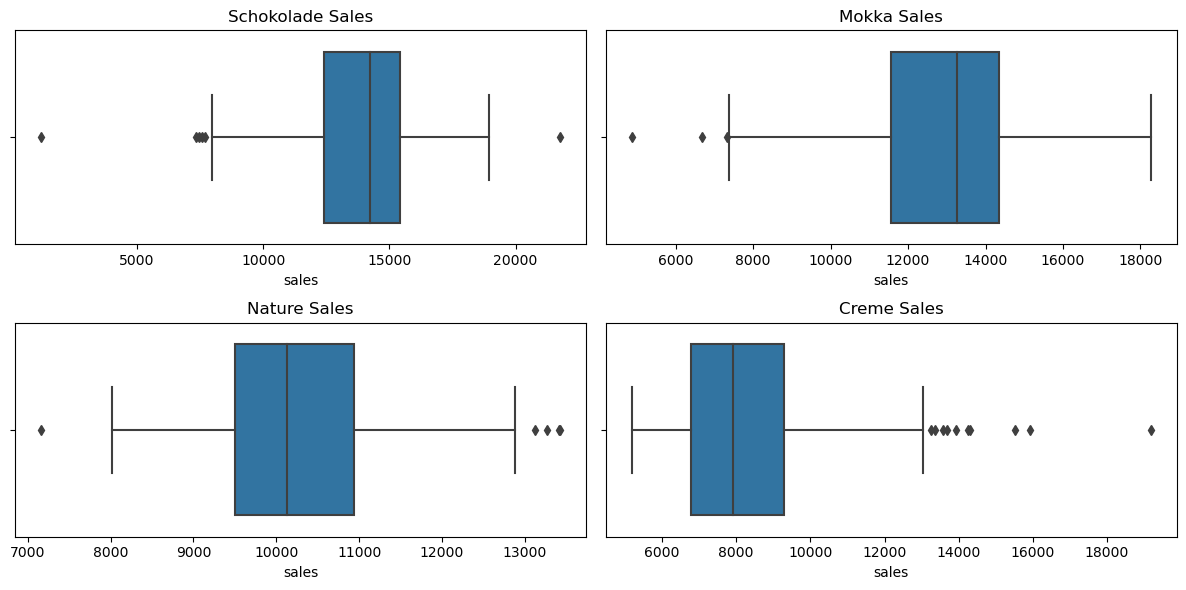

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot the first boxplot in the top-left subplot
sns.boxplot(x=schokolade['sales'], ax=axes[0, 0])
axes[0, 0].set_title('Schokolade Sales')

# Plot the second boxplot in the top-right subplot
sns.boxplot(x=mokka['sales'], ax=axes[0, 1])
axes[0, 1].set_title('Mokka Sales')

# Plot the third boxplot in the bottom-left subplot
sns.boxplot(x=nature['sales'], ax=axes[1, 0])
axes[1, 0].set_title('Nature Sales')

# Plot the fourth boxplot in the bottom-right subplot
sns.boxplot(x=creme['sales'], ax=axes[1, 1])
axes[1, 1].set_title('Creme Sales')

plt.tight_layout()

plt.show()

In [46]:
cols_drop = ['index', 'weight', 'date_id', 'boss_thema_id']
df2 = df2.drop(cols_drop, axis = 1)

Training and Test Data

Spliting the data between the training and test datasets 
70/30 and 
60/40


In [47]:
# training dataset
X_train = df2[df2['yearweek_start'] < '2021-06-01']
y_train = X_train['sales']

# test dataset
X_test = df2[df2['yearweek_start'] >= '2021-06-01']
y_test = X_test['sales']

print( 'Training Min Date: {}'.format( X_train['yearweek_start'].min() ) )
print( 'Training Max Date: {}'.format( X_train['yearweek_start'].max() ) )

print( '\nTest Min Date: {}'.format( X_test['yearweek_start'].min() ) )
print( 'Test Max Date: {}'.format( X_test['yearweek_start'].max() ) )

Training Min Date: 2018-01-08 00:00:00
Training Max Date: 2021-05-31 00:00:00

Test Min Date: 2021-06-07 00:00:00
Test Max Date: 2023-08-21 00:00:00
